In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nltk

In [2]:
df = pd.read_csv('Restaurant reviews.csv')

In [3]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [4]:
df.shape

(10000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [6]:
null_percentage = (df.isnull().mean() * 100).round(2)
null_percentage

Restaurant     0.00
Reviewer       0.38
Review         0.45
Rating         0.38
Metadata       0.38
Time           0.38
Pictures       0.00
7514          99.99
dtype: float64

In [7]:
# drop unneccessary columns
df.drop(columns=['Reviewer', '7514'],axis=1,inplace=True)

In [8]:
df[df.isnull().any(axis=1)]

,Restaurant,Review,Rating,Metadata,Time,Pictures
2360,Amul,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,NaN,5,1 Review,7/20/2018 22:42,0
8777,American Wild Wings,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,0


In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Review      9955 non-null   object
 2   Rating      9955 non-null   object
 3   Metadata    9955 non-null   object
 4   Time        9955 non-null   object
 5   Pictures    9955 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 544.4+ KB


In [11]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

## Exploratory Data Analysis

In [12]:
# Highest rated restaurants
res_rating = df.groupby('Restaurant', as_index=False)['Rating'].mean().sort_values(by='Rating', ascending=False)[:10]

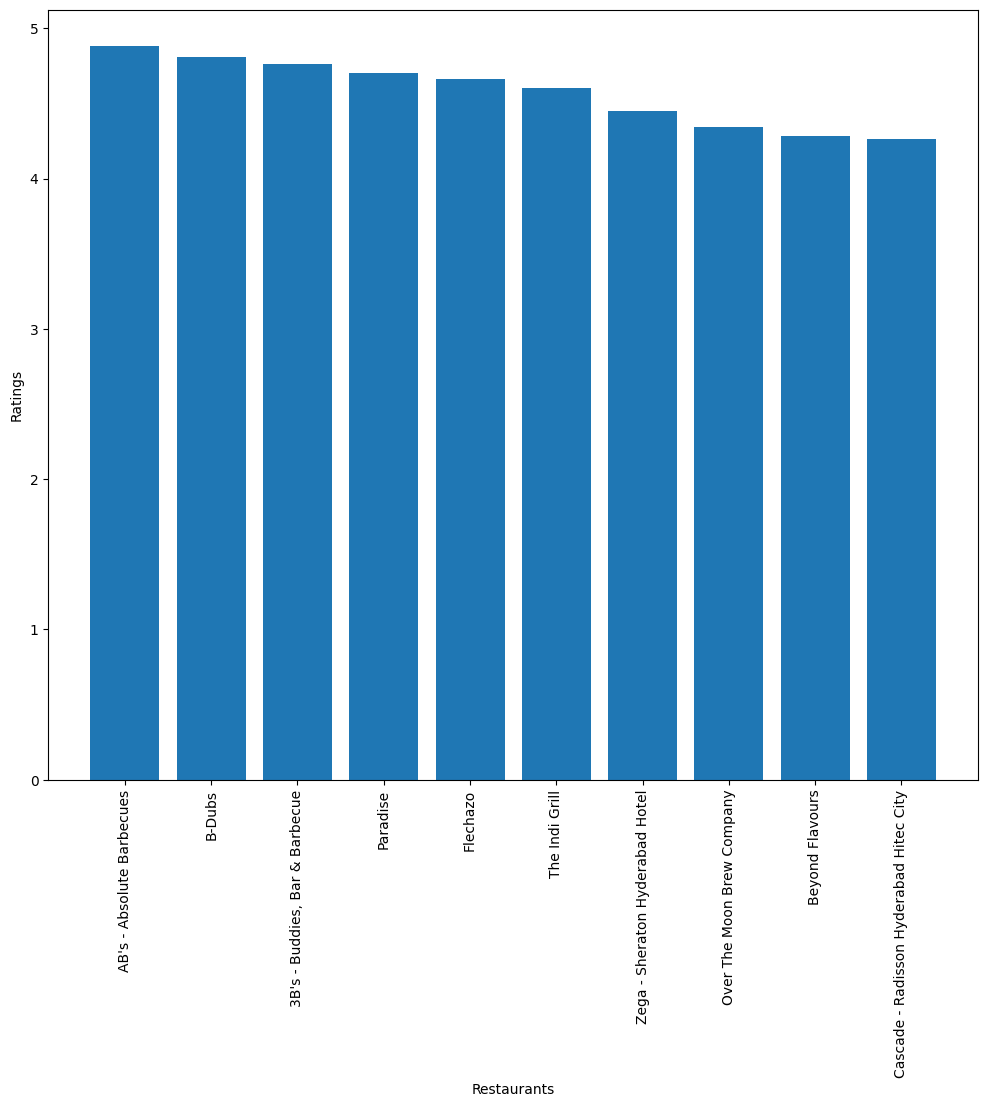

In [13]:
plt.figure(figsize=(12,10))
plt.bar(res_rating['Restaurant'], res_rating['Rating'])
plt.xlabel('Restaurants')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

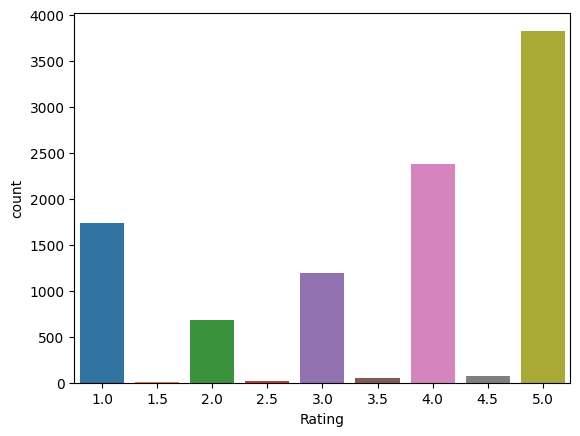

In [14]:
# Rating Distribution
sns.countplot(df, x='Rating')
plt.show()

In [15]:
# Most of the reviews are very positive.

In [16]:
df.columns

Index(['Restaurant', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures'], dtype='object')

In [17]:
df['num_char'] = df['Review'].apply(lambda x: len(x))
df['num_words'] = df['Review'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['Review'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [18]:
df.head()

,Restaurant,Review,Rating,Metadata,Time,Pictures,num_char,num_words,num_sentences
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,222,45,5
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,144,31,5
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,189,37,3
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,148,32,2
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,160,33,6


In [19]:
corr_matrix = df[['num_char', 'num_words', 'num_sentences', 'Rating']].corr()

In [20]:
corr_matrix

,num_char,num_words,num_sentences,Rating
num_char,1.000000,0.997168,0.850437,-0.031562
num_words,0.997168,1.000000,0.863912,-0.040230
num_sentences,0.850437,0.863912,1.000000,-0.020458
Rating,-0.031562,-0.040230,-0.020458,1.000000


<Axes: >

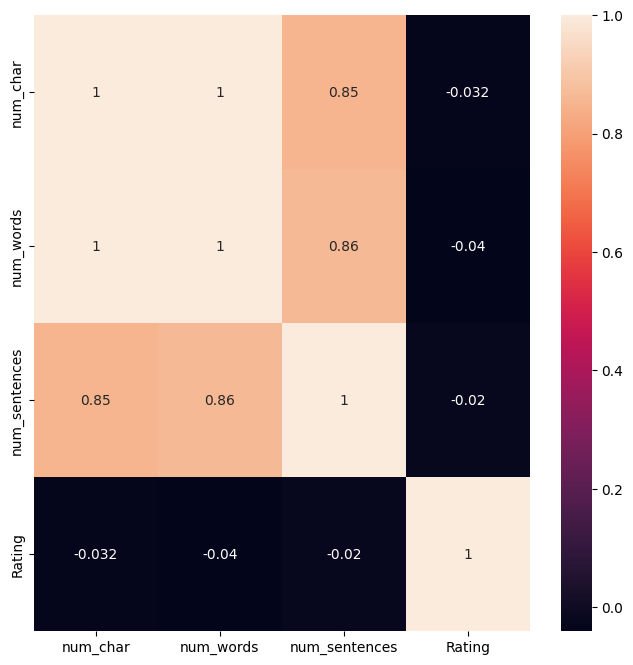

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, )

In [22]:
# Thers's very weak correlation between Rating and the length of words and sentences.

## Sentiment Analysis

In [23]:
# create a target column for analysis using the ratings
df['Sentiment'] = df['Rating'].apply(lambda x: 'positive' if x>=4 else('neutral' if x>=3 else 'negative'))

In [24]:
# text preprocessing
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\Zafar
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def preprocess_text(text):
    text = nltk.word_tokenize(text.lower())
    text = [word for word in text if word not in stopwords.words('english')]
    text = [stemmer.stem(word) for word in text if word.isalnum()] 
    return ' '.join(text)

In [26]:
df['format_text'] = df['Review'].apply(preprocess_text)

In [27]:
df.head()

,Restaurant,Review,Rating,Metadata,Time,Pictures,num_char,num_words,num_sentences,Sentiment,format_text
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,222,45,5,positive,ambienc good food quit good saturday lunch cos...
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,144,31,5,positive,ambienc good pleasant even servic prompt food ...
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,189,37,3,positive,must tri great food great ambienc thnx servic ...
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,148,32,2,positive,soumen da arun great guy behavior sincereti go...
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,160,33,6,positive,food order kodi drumstick basket mutton biryan...


In [28]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=400, min_font_size=8, background_color='white', max_words=300)

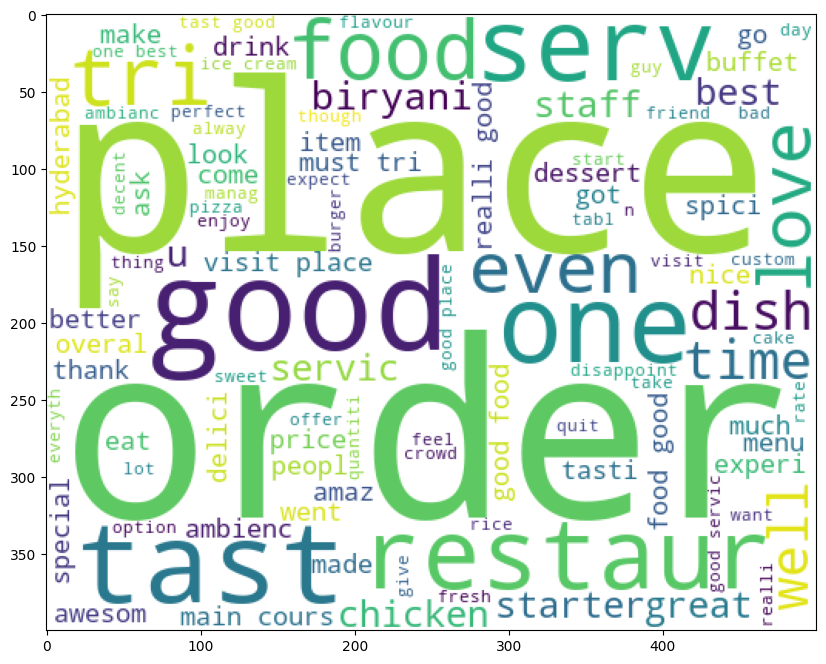

In [29]:
cloud = wc.generate(df['format_text'].str.cat(sep=' '))
plt.figure(figsize=(10,8))
plt.tight_layout()
plt.imshow(cloud)
plt.show()

In [30]:
# From the above word cloud most of the repeated words seems positive. 

## Model Training 

In [31]:
# lets encode the target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
df['Sentiment_label'] = le.fit_transform(df['Sentiment'])

In [33]:
X = df['format_text']
Y = df['Sentiment_label']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
print(X.shape)
print(Y.shape)

(9955,)
(9955,)


In [36]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [37]:
# text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)

In [38]:
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [40]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(kernel='linear'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'k-Nearest Neighbors (KNN)' : KNeighborsClassifier()
}

In [41]:
results = []

for name, model in models.items():
    model.fit(x_train_tfidf, y_train)
    y_pred_train = model.predict(x_train_tfidf)
    y_pred_test = model.predict(x_test_tfidf)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train, average='macro')
    
    accuracy = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test, average='macro')

    result = {
        'Model Name': name,
        'Accuracy Train': accuracy_train,
        'F1 Train': f1_train,
        'Accuracy Test': accuracy,
        'F1 Test': f1
    }

    results.append(result)

In [88]:
result_df = pd.DataFrame(results)
result_df

,Model Name,Accuracy Train,F1 Train,Accuracy Test,F1 Test
0,Logistic Regression,0.874937,0.759755,0.822702,0.649175
1,Multinomial Naive Bayes,0.801858,0.560739,0.773481,0.530557
2,Random Forest,0.989201,0.985378,0.802109,0.570184
3,Support Vector Machine,0.892767,0.797710,0.821698,0.655923
4,Gradient Boosting,0.827097,0.691592,0.791562,0.598737
5,k-Nearest Neighbors (KNN),0.855349,0.616584,0.640382,0.353516


In [43]:
# Logistics regression seems to be the best choice from above models. Its also faster on big dataset compared to other mdoels.

In [44]:
# Lets perform some hyperparameter tuning to see if model can be improved further.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [45]:
param_grid = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'max_iter': [100, 150, 200, 250, 300]
    
}

In [46]:
lr = LogisticRegression()

In [47]:
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', cv=5)

In [48]:
grid_search.fit(x_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 150, 200, 250, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [71]:
hyper_tuning = []
y_pred_lr = grid_search.predict(x_test_tfidf)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print(f'Accuracy Score: {accuracy_lr:.3f}')
print(f'F1 Score: {f1_lr:.3f}')
hyper_tuning.append({'hyper-tuned accuracy':accuracy_lr, 'hyper-tuned F1': f1_lr})

Accuracy Score: 0.823
F1 Score: 0.649


In [50]:
# Random Forest had a good performance on training data. Lets perform some hyperparameter tuning.
rf = RandomForestClassifier()

In [51]:
from scipy.stats import randint
param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': randint(50, 200),         # Number of trees in the forest
    'max_depth': randint(5, 50),             # Maximum depth of each tree
    'min_samples_split': randint(2, 20),      # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),       # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False] 
}


In [52]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

In [53]:
random_search.fit(x_train_tfidf, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023F4517FAF0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023F4567E250>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023F430C3610>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023F430BE6A0>},
                   random_state=42, scoring='accuracy')

In [54]:
random_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 37,
 'min_samples_leaf': 12,
 'min_samples_split': 13,
 'n_estimators': 138}

In [55]:
y_pred_rf = random_search.predict(x_test_tfidf)

In [72]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print(f'Accuracy Score: {accuracy_rf:.3f}')
print(f'F1 Score: {f1_rf:.3f}')
hyper_tuning.append({'hyper-tuned accuracy':accuracy_rf, 'hyper-tuned F1': f1_rf})

Accuracy Score: 0.768
F1 Score: 0.524


In [57]:
svm = SVC()

In [58]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1]

}

In [59]:
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, scoring='accuracy', cv=3, verbose=2)

In [60]:
#grid_search_svm.fit(x_train_tfidf, y_train)

In [61]:
# after fitting the trainign data, best parameters we got through grid_search_svm.best_params_ are {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}.

In [62]:
# Lets put the parameters into use and see if svm model can be improved further.
svm = SVC(C=1, degree=2, gamma='scale', kernel='rbf')

In [63]:
svm.fit(x_train_tfidf, y_train)

SVC(C=1, degree=2)

In [64]:
y_pred_svm = svm.predict(x_test_tfidf)

In [73]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print(f'Accuracy Score: {accuracy_svm:.3f}')
print(f'F1 Score: {f1_svm:.3f}')
hyper_tuning.append({'hyper-tuned accuracy':accuracy_svm, 'hyper-tuned F1': f1_svm})

Accuracy Score: 0.818
F1 Score: 0.615


In [66]:
# New parameters seems to be worsening the performance. we will stick with the 'linear' method and will keep the 2nd degree 

In [74]:
hyper_tuning

[{'hyper-tuned accuracy': 0.8227021597187343,
  'hyper-tuned F1': 0.6491748757654193},
 {'hyper-tuned accuracy': 0.7679558011049724,
  'hyper-tuned F1': 0.523762273510298},
 {'hyper-tuned accuracy': 0.8176795580110497,
  'hyper-tuned F1': 0.6149709315706495}]

In [106]:
selected_models = result_df.iloc[[0,2,3]].reset_index()

In [107]:
selected_models = pd.concat([selected_models, pd.DataFrame(hyper_tuning)],axis=1)

In [108]:
selected_models

,index,Model Name,Accuracy Train,F1 Train,Accuracy Test,F1 Test,hyper-tuned accuracy,hyper-tuned F1
0,0,Logistic Regression,0.874937,0.759755,0.822702,0.649175,0.822702,0.649175
1,2,Random Forest,0.989201,0.985378,0.802109,0.570184,0.767956,0.523762
2,3,Support Vector Machine,0.892767,0.797710,0.821698,0.655923,0.817680,0.614971
